##### **Flight Fare Prediction**: In this project we will be predicting the Fare of a flight a person has to give on inputting the data using the normal Machine Learning techniques then we will see how we can do the same thing with the help of using Auto SK Learn which is a Auto ML Library.

### **Importing Libraries**

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import KernelPCA
import time
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

### **Data Pre-Processing I**

#### **Reading our Data set**

In [147]:
df= pd.read_csv("flight data.csv")
print(df.shape)
df.head()

(10683, 11)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [148]:
df['Price'].describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

#### **Dealing with Null values**

In [97]:
#viewing the number of null values in each column
print(df.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [98]:
#removing rows containing missing values in the route, total stops; as the missing values in these columns were less
df.dropna(axis=0, how='any', inplace=True)
#viewing the number of null values in each column
print(df.isnull().sum())
#viewing a summary of the data
print(df.info())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB
None


### **Exploratory Data Analysis**

#### **Let's see the relation b/w airline and price**

In [99]:
df['Airline'].value_counts() ## checking for airline data

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

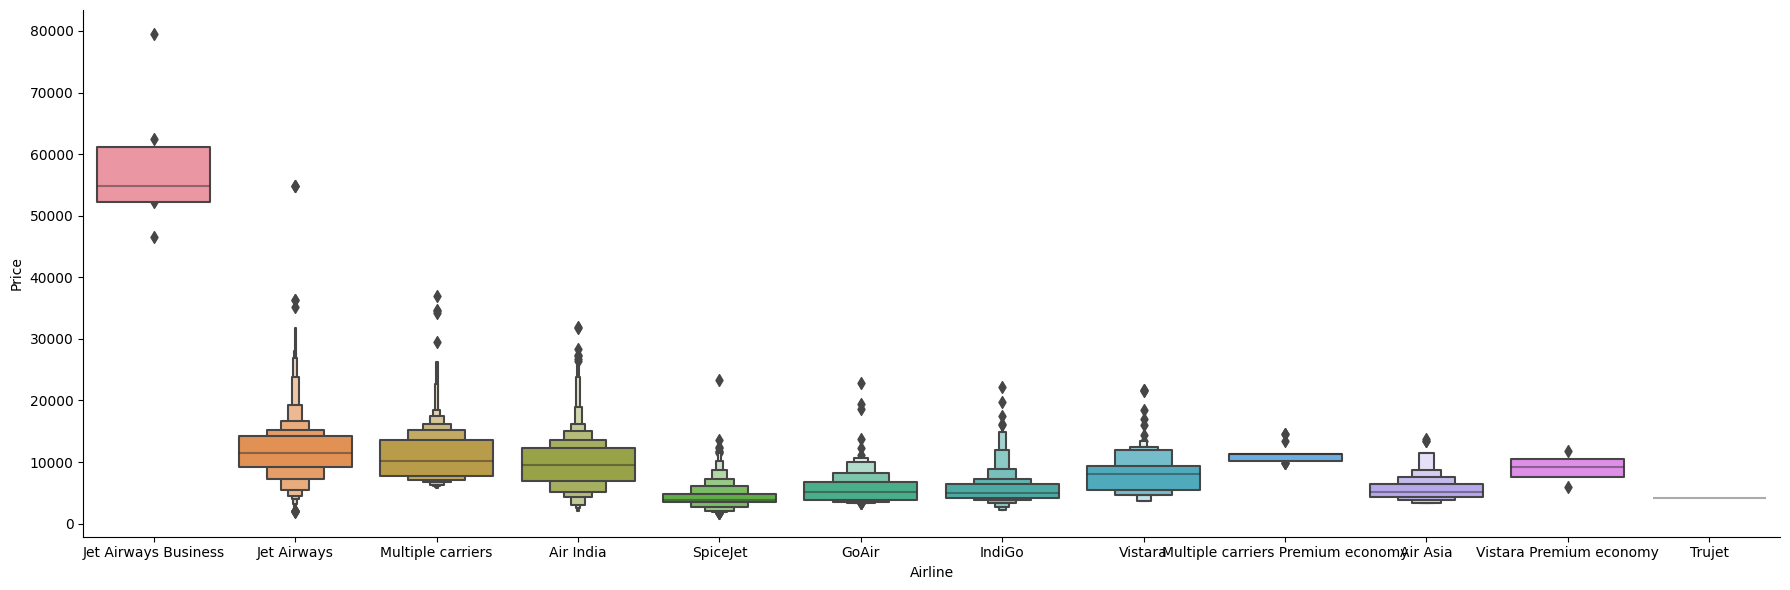

In [100]:
sns.catplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

 #### **Jet airways business have the highest fare**

#### **Finding relation b/w Source and price**

In [101]:
df['Source'].value_counts() ## checking for Source

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

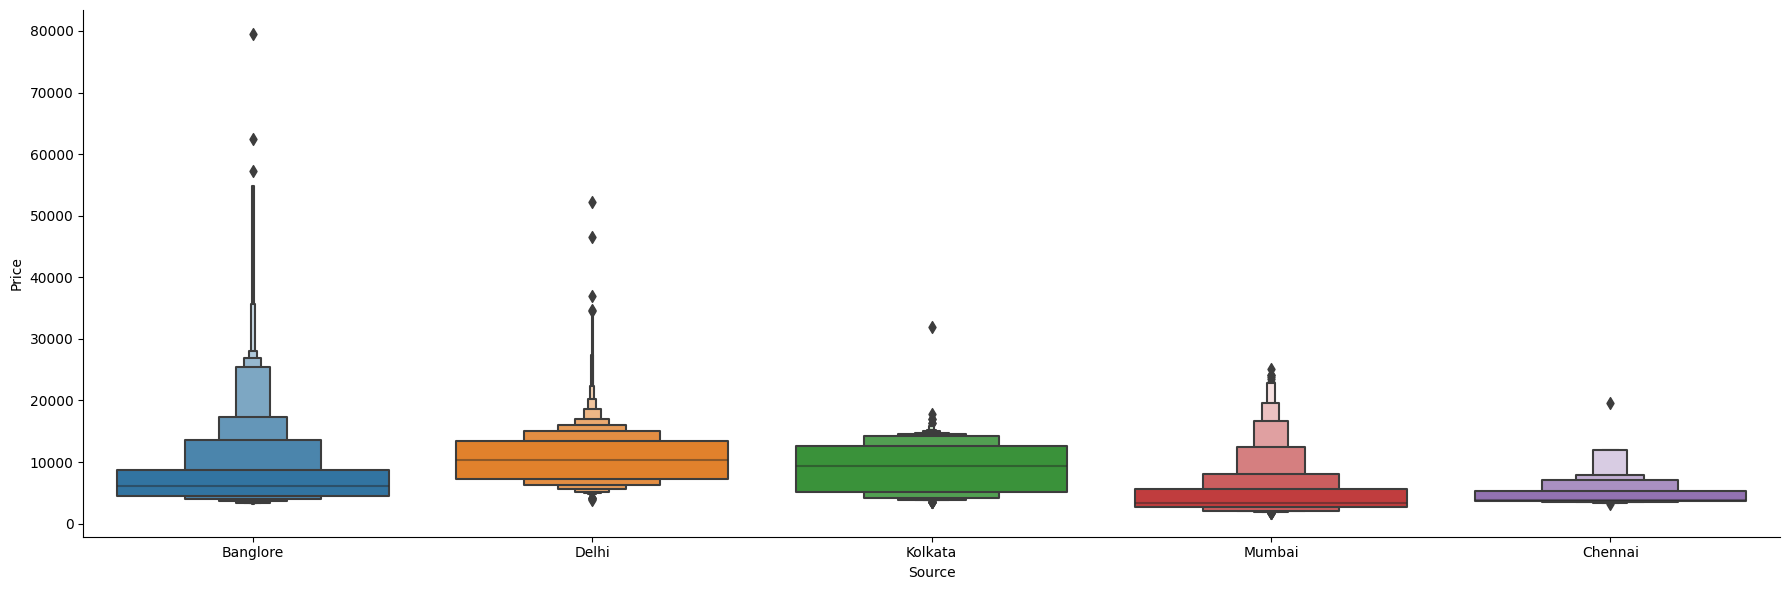

In [102]:
sns.catplot(y='Price',x='Source',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

#### **Doing the same for destination**

In [103]:
df['Destination'].value_counts() ## checking for Destination

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

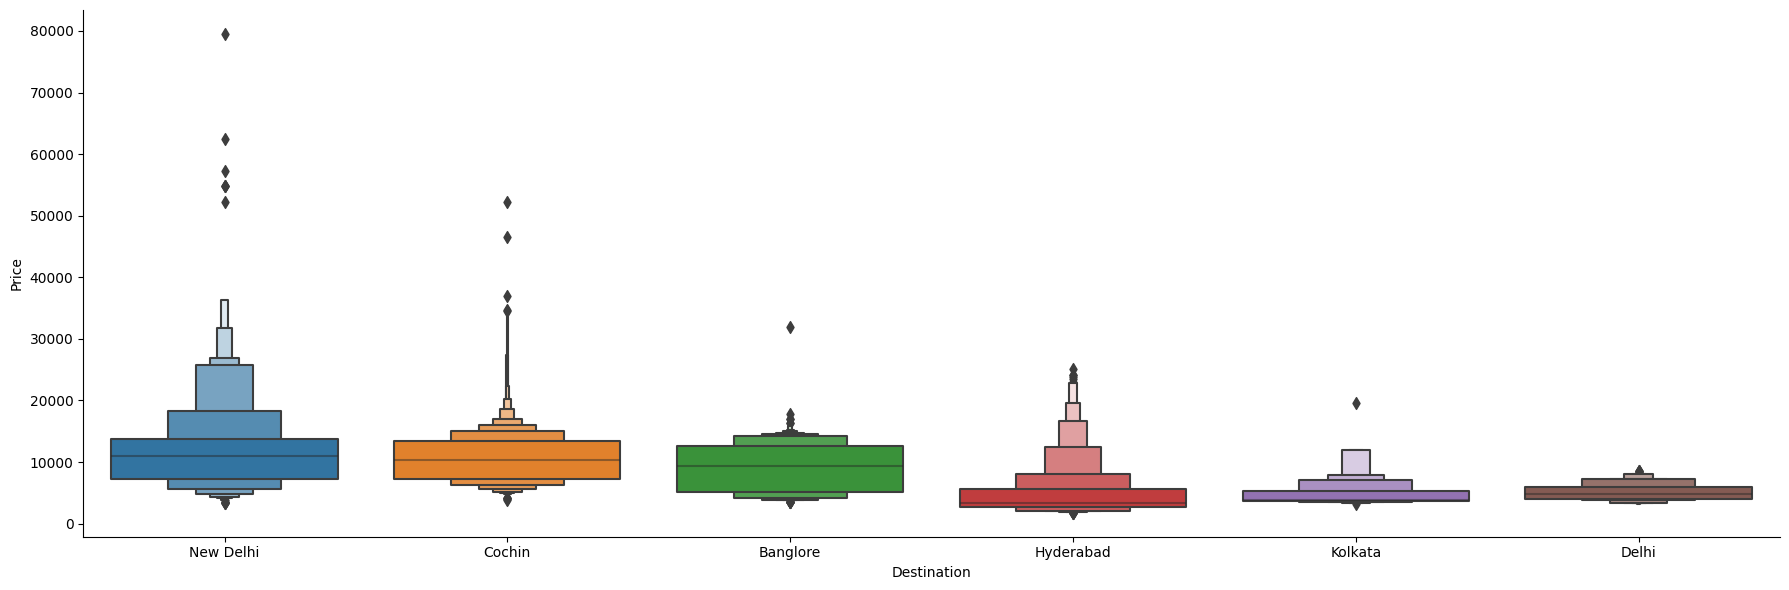

In [104]:
sns.catplot(y='Price',x='Destination',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

#### **Doing the same for Duration**

In [105]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [106]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [107]:
df['Total_min']=int(0)
for i in range(df.shape[0]):
  if df['Duration'].loc[df.index[i]] != '':
    min=0
    dur=df['Duration'].loc[df.index[i]].split(' ')
    if 'h' in dur[0]:
      min=60*int(dur[0].split('h')[0])
      if len(dur)==2:
        min=min+int(dur[1].split('m')[0])
    else:
      min=24*60+int(dur[0].split('m')[0])
    df.at[i,'Total_min']=min

df=df.drop(['Duration'],axis=1)
df=df.astype({'Total_min':'int'})
df.dropna(axis=0,how='any',inplace=True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Total_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897.0,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662.0,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882.0,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218.0,325
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302.0,285


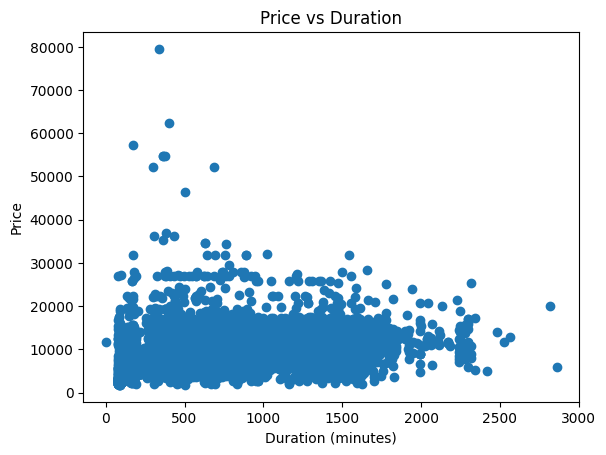

In [108]:
plt.scatter(df['Total_min'],df['Price'])
plt.xlabel('Duration (minutes)')
plt.ylabel('Price')
plt.title('Price vs Duration')
plt.show()

#### **Let's see if Additional Info has any effect on price**

In [109]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

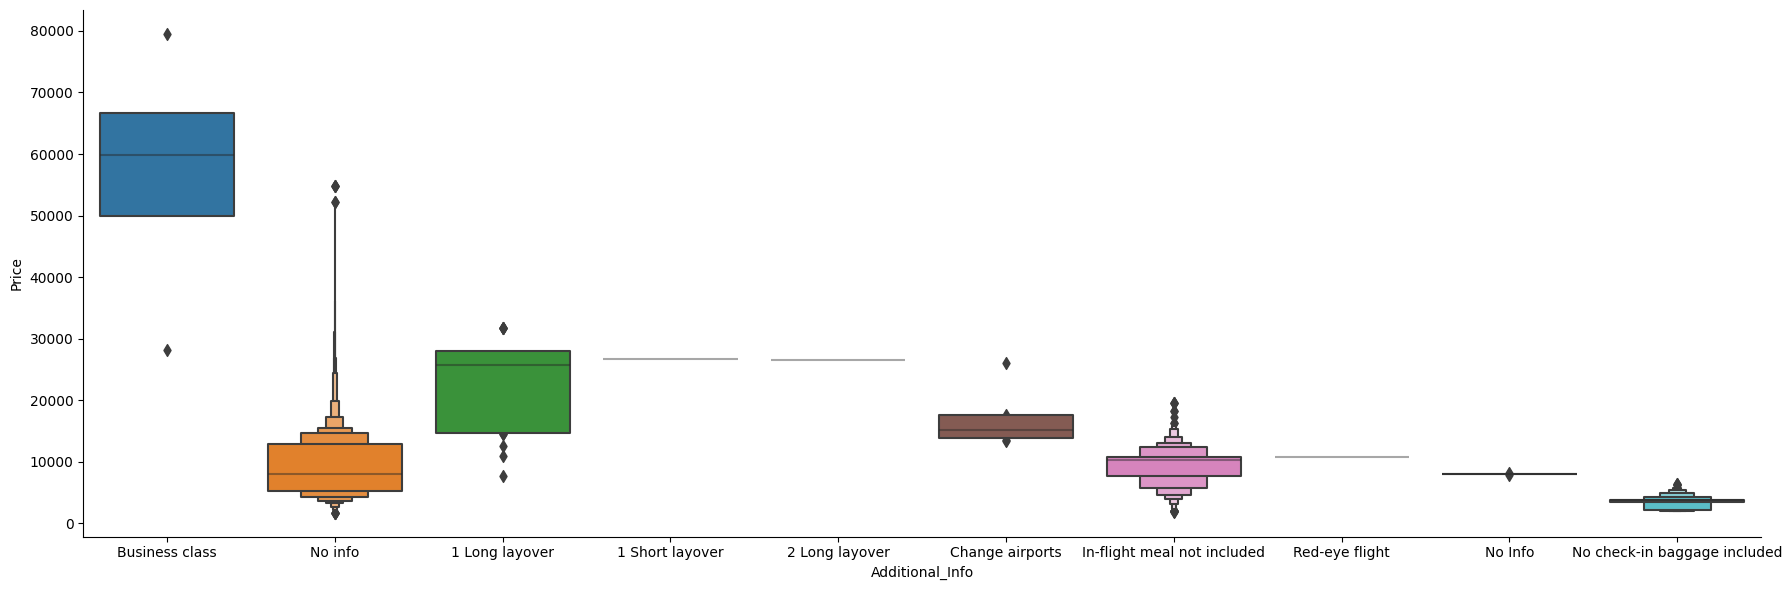

In [110]:
sns.catplot(y='Price',x='Additional_Info',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

#### **Let's analyse our Stop coloumn**

In [111]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [112]:
df['Total_Stops']=df['Total_Stops'].replace('non-stop','0 stop')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Total_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,0 stop,No info,3897.0,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662.0,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882.0,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218.0,325
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302.0,285


In [113]:
df['Stop'] = df['Total_Stops'].str.split(' ').str[0]
df['Stop']=df['Stop'].astype(int)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Total_min,Stop
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,0 stop,No info,3897.0,170,0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662.0,445,2
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882.0,1140,2
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218.0,325,1
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302.0,285,1


In [114]:
df=df.drop(['Total_Stops'],axis=1)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Additional_Info,Price,Total_min,Stop
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,No info,3897.0,170,0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,No info,7662.0,445,2
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,No info,13882.0,1140,2
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,No info,6218.0,325,1
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,No info,13302.0,285,1


In [115]:
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Additional_Info     object
Price              float64
Total_min            int64
Stop                 int64
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

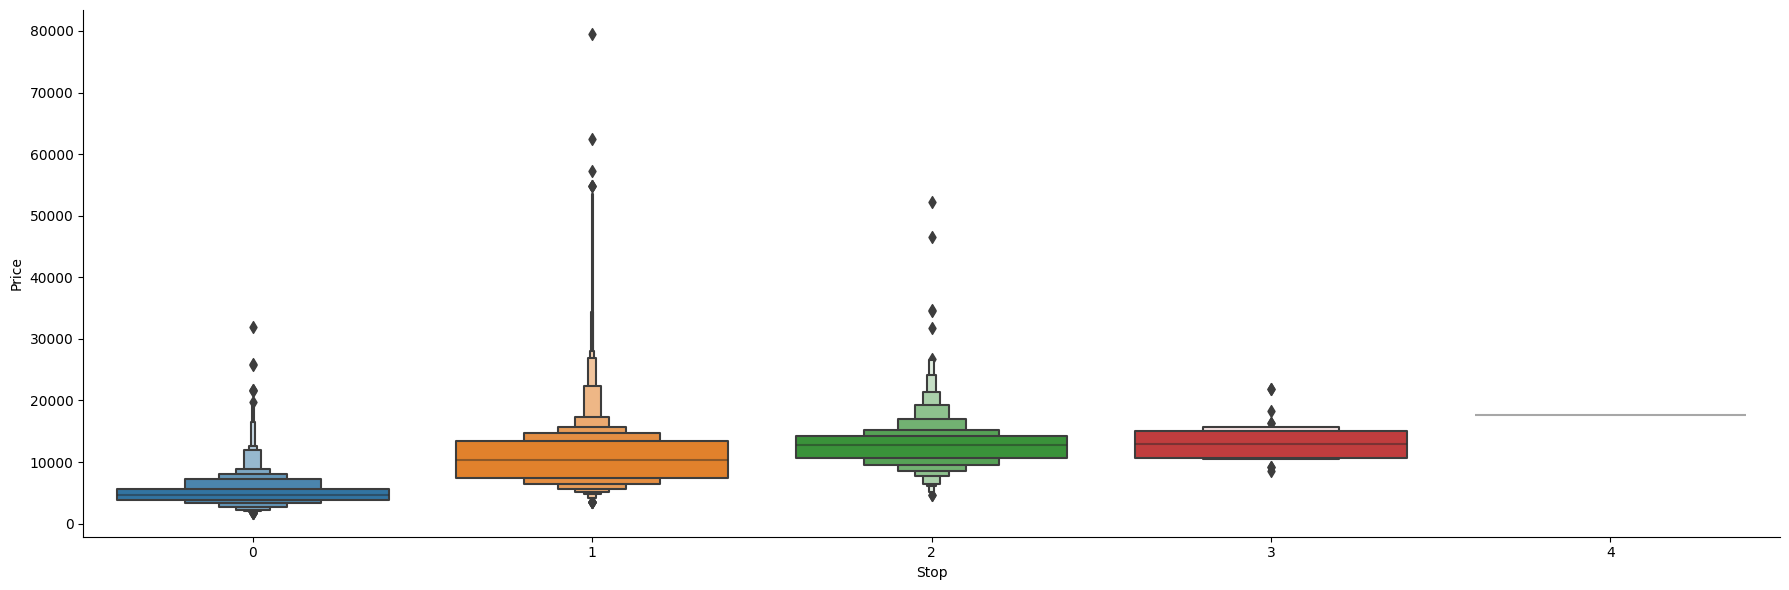

In [116]:
sns.catplot(y='Price',x='Stop',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

### **Data Pre-Processing II**

#### **Feature Engineering**

In [117]:
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df=df.drop(['Date_of_Journey'],axis=1)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Additional_Info,Price,Total_min,Stop,Date,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,No info,3897.0,170,0,24,03
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,No info,7662.0,445,2,1,05
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,No info,13882.0,1140,2,9,06
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,No info,6218.0,325,1,12,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,No info,13302.0,285,1,01,03


In [118]:
df=df.astype({'Date': 'int', 'Month':'int'})
df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Additional_Info     object
Price              float64
Total_min            int64
Stop                 int64
Date                 int64
Month                int64
dtype: object

#### **Filtering the Arrival Time**

In [119]:
df['Arrival_Time']=df['Arrival_Time'].str.split(' ').str[0]

In [120]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Additional_Info,Price,Total_min,Stop,Date,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,No info,3897.0,170,0,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,No info,7662.0,445,2,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,No info,13882.0,1140,2,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,No info,6218.0,325,1,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,No info,13302.0,285,1,1,3


 #### **Similarly we will try to convert all the features to numerical variables**

In [121]:
df['Arrival_Hour'] = df['Arrival_Time'] .str.split(':').str[0]
df['Arrival_Minute'] = df['Arrival_Time'] .str.split(':').str[1]
df['Arrival_Hour']=df['Arrival_Hour'].astype(int)
df['Arrival_Minute']=df['Arrival_Minute'].astype(int)
df=df.drop(['Arrival_Time'],axis=1)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Additional_Info,Price,Total_min,Stop,Date,Month,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,No info,3897.0,170,0,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,No info,7662.0,445,2,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,No info,13882.0,1140,2,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,No info,6218.0,325,1,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,No info,13302.0,285,1,1,3,21,35


In [122]:
df['Departure_Hour'] = df['Dep_Time'] .str.split(':').str[0]
df['Departure_Minute'] = df['Dep_Time'] .str.split(':').str[1]
df['Departure_Hour']=df['Departure_Hour'].astype(int)
df['Departure_Minute']=df['Departure_Minute'].astype(int)
df=df.drop(['Dep_Time'],axis=1)
df.head()

,Airline,Source,Destination,Route,Additional_Info,Price,Total_min,Stop,Date,Month,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,3897.0,170,0,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,7662.0,445,2,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,13882.0,1140,2,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,6218.0,325,1,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,13302.0,285,1,1,3,21,35,16,50


#### **Let's divide the route into different columns**

In [123]:
df['Route_1']= df['Route'].str.split('→ ').str[0]
df['Route_2']= df['Route'].str.split('→ ').str[1]
df['Route_3']= df['Route'].str.split('→ ').str[2]
df['Route_4']= df['Route'].str.split('→ ').str[3]
df['Route_5']= df['Route'].str.split('→ ').str[4]

df['Route_1'].fillna("None",inplace=True)
df['Route_2'].fillna("None",inplace=True)
df['Route_3'].fillna("None",inplace=True)
df['Route_4'].fillna("None",inplace=True)
df['Route_5'].fillna("None",inplace=True)

df=df.drop(['Route'],axis=1)

df.head()

,Airline,Source,Destination,Additional_Info,Price,Total_min,Stop,Date,Month,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,No info,3897.0,170,0,24,3,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662.0,445,2,1,5,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882.0,1140,2,9,6,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218.0,325,1,12,5,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302.0,285,1,1,3,21,35,16,50,BLR,NAG,DEL,None,None


In [124]:
df.isnull().sum()

Airline             0
Source              0
Destination         0
Additional_Info     0
Price               0
Total_min           0
Stop                0
Date                0
Month               0
Arrival_Hour        0
Arrival_Minute      0
Departure_Hour      0
Departure_Minute    0
Route_1             0
Route_2             0
Route_3             0
Route_4             0
Route_5             0
dtype: int64

#### **Detecting & Removing Outliers using QIF Technique**

In [125]:
#Finding out which independent variables are continuous and which are categorical
col_num_df=[]
columns=df.columns
col_str_df=[]
for i in range(df.shape[1]):
  type_=df[columns[i]].dtype
  if type_=='int64':
    col_num_df.append(columns[i])
  else:
    col_str_df.append(columns[i])

print(col_num_df)
print(col_str_df)

['Total_min', 'Stop', 'Date', 'Month', 'Arrival_Hour', 'Arrival_Minute', 'Departure_Hour', 'Departure_Minute']
['Airline', 'Source', 'Destination', 'Additional_Info', 'Price', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']


In [126]:
print("Old Shape: ", df.shape)

''' Detection '''
for x in col_num_df:
  Q1 = df[x].quantile(0.25)
  Q3 = df[x].quantile(0.75)
  IQR = Q3 - Q1
  # Calculate the upper and lower limits
  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR

  # Create arrays of Boolean values indicating the outlier rows
  upper_array = np.where(df[x] >= upper)[0]
  lower_array = np.where(df[x] <= lower)[0]

  # Removing the outliers
  df.drop(index=upper_array, inplace=True)
  df.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df.shape)

Old Shape:  (10682, 18)
New Shape:  (10575, 18)


#### **VIF to check multicollinearity among continuous variables**

In [127]:
#Creating a dataframe containing only the columns having numerical variables
df_1=df[col_num_df]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_1.columns

# calculating VIF for each numerical feature
vif_data["VIF"] = [variance_inflation_factor(df_1.to_numpy(), i) for i in range(len(df_1.columns))]

vif_data.head(10)

,feature,VIF
0,Total_min,4.207569
1,Stop,4.006896
2,Date,3.228590
3,Month,9.087825
4,Arrival_Hour,4.296350
5,Arrival_Minute,2.934363
6,Departure_Hour,5.277804
7,Departure_Minute,2.530813


#### **One Hot Encoding categorical variables**

In [128]:
df_X=df.drop(['Price'], axis=1)
df_y=df['Price'].copy()

X= df_X.iloc[:, :].values
y= df_y.iloc[:].values
print(X[:10,:])
cat_X=[]#list to store indices of categorical columns so we can one hot encode them later
num_X=[]#list to store numerical columns so we cna one hot encode them later
col=df_X.columns
for i in range(df_X.shape[1]):
  if df_X[col[i]].dtype=='object':
    cat_X.append(i)
  else:
    num_X.append(i)

ct=ColumnTransformer(transformers=[('encoder', OneHotEncoder(), cat_X)], remainder='passthrough')
X=(ct.fit_transform(X)).toarray()
print(np.round(X[:10,:]))

[['IndiGo' 'Banglore' 'New Delhi' 'No info' 170 0 24 3 1 10 22 20 'BLR '
  'DEL' 'None' 'None' 'None']
 ['Air India' 'Kolkata' 'Banglore' 'No info' 445 2 1 5 13 15 5 50 'CCU '
  'IXR ' 'BBI ' 'BLR' 'None']
 ['Jet Airways' 'Delhi' 'Cochin' 'No info' 1140 2 9 6 4 25 9 25 'DEL '
  'LKO ' 'BOM ' 'COK' 'None']
 ['IndiGo' 'Kolkata' 'Banglore' 'No info' 325 1 12 5 23 30 18 5 'CCU '
  'NAG ' 'BLR' 'None' 'None']
 ['IndiGo' 'Banglore' 'New Delhi' 'No info' 285 1 1 3 21 35 16 50 'BLR '
  'NAG ' 'DEL' 'None' 'None']
 ['SpiceJet' 'Kolkata' 'Banglore' 'No info' 145 0 24 6 11 25 9 0 'CCU '
  'BLR' 'None' 'None' 'None']
 ['Jet Airways' 'Banglore' 'New Delhi' 'In-flight meal not included' 930
  1 12 3 10 25 18 55 'BLR ' 'BOM ' 'DEL' 'None' 'None']
 ['Jet Airways' 'Banglore' 'New Delhi' 'No info' 1265 1 1 3 5 5 8 0
  'BLR ' 'BOM ' 'DEL' 'None' 'None']
 ['Jet Airways' 'Banglore' 'New Delhi' 'In-flight meal not included' 1530
  1 12 3 10 25 8 55 'BLR ' 'BOM ' 'DEL' 'None' 'None']
 ['Multiple carriers' 'D

#### **Splitting data into train and test set**

In [129]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=1)

#### **Feature Scaling**

In [130]:
sc_X=StandardScaler()
sc_y=StandardScaler()
print(X[0,:])
print('We can see that all the categorical variables have been added in the left side, \nSo remaining 8 columns on the right must be the numerical ones, lets scale them')

[  0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.
   0.   0.   0.   1.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.
   0.   0.   0.   0.   1.   0. 170.   0.  24.   3.   1.  10.  22.  20.]
We can see that all the categorical variables have been added in the left side, 
So remaining 8 columns on the right must be the numerical ones, lets scale them


In [131]:
#We can see that all the categorical variables have been added in the left side,
#so remaining 8 columns on the right must be the numerical ones, lets scale them
print(X_train[0,:])
X_train[:,-8:]=sc_X.fit_transform(X_train[:,-8:])
X_test[:,-8:]=sc_X.transform(X_test[:,-8:])
y_train=sc_y.fit_transform(y_train.reshape(-1,1))
y_test=sc_y.transform(y_test.reshape(-1,1))
print(X_train[0,:])
print('Now our numerical features have been scaled appropriately')

[  0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   1.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.
   0.   0.   0.   1.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.
   0.   0.   0.   0.   1.   0. 170.   0.  24.   3.   8.  35.   5.  45.]
[ 0.          0.          0.          0.          0.          0.
  0.          0.          1.          0.          0.          0.
  1.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          1.          0.
  0.          0.          0. 

#### **Kernel PCA to remove multicollinearity**

In [132]:
kpca=KernelPCA(n_components=65)
X_train=kpca.fit_transform(X_train)
X_test=kpca.transform(X_test)

### **Modeling**

#### **Random Forest Regression**

In [133]:
reg_rf=RandomForestRegressor(n_estimators= 100, min_samples_split=3, min_samples_leaf= 1, max_features='sqrt', max_depth= 15)
start = time.process_time()
reg_rf.fit(X_train,y_train)
print("Time taken by Random Forest Regression: "+str(time.process_time() - start))

y_pred=reg_rf.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
# Calculate the adjusted R-squared score
n = X_test.shape[0]  # number of observations
k = X_test.shape[1]  # number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')
print('MAE:', sc_y.inverse_transform(metrics.mean_absolute_error(y_test, y_pred).reshape(1,1))[0,0])
print('MSE:', sc_y.inverse_transform(metrics.mean_squared_error(y_test, y_pred).reshape(1,1))[0,0])
print('RMSE:', sc_y.inverse_transform(np.sqrt(metrics.mean_squared_error(y_test, y_pred)).reshape(1,1))[0,0])

<ipython-input-133-93a7188cb5a7>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg_rf.fit(X_train,y_train)


Time taken by Random Forest Regression: 8.228817831000015
R-squared: 0.824878873288797
Adjusted R-squared: 0.819323542280389
MAE: 10088.686062576653
MSE: 9854.895002765259
RMSE: 10976.2182294204


#### **Multiple Linear Regression**

In [134]:
regressor=LinearRegression()
start = time.process_time()
regressor.fit(X_train,y_train)
print("Time taken by Multiple Linear Regression: "+str(time.process_time() - start))

y_pred=regressor.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
# Calculate the adjusted R-squared score
n = X_test.shape[0]  # number of observations
k = X_test.shape[1]  # number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')
print('MAE:', sc_y.inverse_transform(metrics.mean_absolute_error(y_test, y_pred).reshape(1,1))[0,0])
print('MSE:', sc_y.inverse_transform(metrics.mean_squared_error(y_test, y_pred).reshape(1,1))[0,0])
print('RMSE:', sc_y.inverse_transform(np.sqrt(metrics.mean_squared_error(y_test, y_pred)).reshape(1,1))[0,0])

Time taken by Multiple Linear Regression: 0.05433634799999254
R-squared: 0.6878082955680129
Adjusted R-squared: 0.6779047031873008
MAE: 10706.81883602095
MSE: 10475.385498781481
RMSE: 11617.782477157756


#### **Support Vectore Regression**

In [135]:
model=['linear', 'poly', 'rbf', 'sigmoid']
for i in range(4):
  regressor=SVR(kernel=model[i])

  start = time.process_time()
  regressor.fit(X_train,y_train.flatten())
  print("Time taken by SVR ("+str(model[i])+"): "+str(time.process_time() - start))

  y_pred=np.array(sc_y.inverse_transform(regressor.predict(X_test).reshape(-1,1)))

  # Calculate the R-squared score
  r2 = r2_score(y_test, y_pred)
  # Calculate the adjusted R-squared score
  n = X_test.shape[0]  # number of observations
  k = X_test.shape[1]  # number of predictors
  adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
  print(f'R-squared: {r2}')
  print(f'Adjusted R-squared: {adj_r2}')
  print('MAE:', sc_y.inverse_transform(metrics.mean_absolute_error(y_test, y_pred).reshape(1,1))[0,0])
  print('MSE:', sc_y.inverse_transform(metrics.mean_squared_error(y_test, y_pred).reshape(1,1))[0,0])
  print('RMSE:', sc_y.inverse_transform(np.sqrt(metrics.mean_squared_error(y_test, y_pred)).reshape(1,1))[0,0])

Time taken by SVR (linear): 14.657408747999966
R-squared: -94835671.86244452
Adjusted R-squared: -97844124.14944251
MAE: 41262953.76414586
MSE: 429301721164.9413
RMSE: 44551329.333275944
Time taken by SVR (poly): 4.865794918999995
R-squared: -97528257.71129158
Adjusted R-squared: -100622126.33805291
MAE: 41329153.85044241
MSE: 441490507093.31665
RMSE: 45179228.388277784
Time taken by SVR (rbf): 3.6311658460000444
R-squared: -97201075.82903188
Adjusted R-squared: -100284565.33312513
MAE: 41312336.49205075
MSE: 440009421569.446
RMSE: 45103397.67087948
Time taken by SVR (sigmoid): 10.96507378199999
R-squared: -8581071018.742746
Adjusted R-squared: -8853286546.455423
MAE: 327916519.0358661
MSE: 38844755039107.14
RMSE: 423707830.7825826


#### **Decision Tree Regression**

In [139]:
regressor=DecisionTreeRegressor(random_state=0)
start = time.process_time()
regressor.fit(X_train,y_train)
print("Time taken by Decision Regression: "+str(time.process_time() - start))

y_pred=regressor.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
# Calculate the adjusted R-squared score
n = X_test.shape[0]  # number of observations
k = X_test.shape[1]  # number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')
print('MAE:', sc_y.inverse_transform(metrics.mean_absolute_error(y_test, y_pred).reshape(1,1))[0,0])
print('MSE:', sc_y.inverse_transform(metrics.mean_squared_error(y_test, y_pred).reshape(1,1))[0,0])
print('RMSE:', sc_y.inverse_transform(np.sqrt(metrics.mean_squared_error(y_test, y_pred).reshape(1,1)))[0,0])

Time taken by Decision Regression: 1.0636106619999737
R-squared: 0.7193187883001534
Adjusted R-squared: 0.7104147967137746
MAE: 10118.409929078014
MSE: 10332.743937111629
RMSE: 11485.379010416696
